# Prelab 4 - Op Amps 1

In [1]:
import jlab as jl
from importlib import reload
reload(jl)

<module 'jlab' from '/Users/n1le/Documents/Classes/PHYS 3330/jlab/src/jlab/__init__.py'>

# Prelab 4 - Op Amps 1

## Golden Rules Summary
- Rule 1: $A\rightarrow \infty$
- Rule 2: No current flows in or out of the inputs $I_+ = I_- = 0$
- Rule 3: Negative feedback forces the voltage at the inverting input to equal the voltage at the non-inverting input; $V_+ = V_-$

## 2.2 Open Loop Gain
2.2.1 What is the open loop DC gain, $A_{vol}$ of the LF356 op-amp?

$A_{vol} = 200 V/mV = 200,000$

## 2.3 Input Impedance
2.3.1 According to the datasheet, what is the input impedance $R_i$?

From the datasheet, $R_i = 10^{12} \Omega$
 
## 2.4 Output Current
2.4.1 What is the maximum output positive current at 0V for a supply voltage of $\pm$15V at $25^\circ C$?

10mA

## 2.5 Intro to negative feedback
Negative feedback results in a circuit with a closed-loop gain $G<A$, which depends on the amount of $V_{out}$ that is fed into $V_-$. Feedback improved linearity, stability of output and greatly increases bandwidth. The bandwidth times the DC gain is a constant values called the gain bandwidth product, so the smaller the gain, the wider the bandwidth. When the gain is 1, the 3dB point is equal to the GBW, and is called the unity gain frequency $f_T$. 

- Defn: Closed-loop gain, G-- when a fraction of output is fed back into the inverting $V_-$, the op-amp's gain is reduced from A to some value G. $G(f) = \frac{G_0}{1+ j \frac{f}{f_B}}$
- Defn: Closed-loop DC gain, $G_0$--closed loop gain at frequencies well below the 3dB point. Except with active filters, the idea of a op-amp is to operate at a frequency such that $G(f) = G_0$. Thus the closed-loop DC gain is uaually called gain.
- Defn: 3dB point: $f_B$ -- the frequency where G drops -3dB from $G_0$. This is often called bandwidth. Typical operation done below this frequency
- Defn: Gain bandwidth product GBW -- the product of the DC gain and the 3dB point is a constant. 
- Defn: Unity gain frequency $f_T$--the 3dB point when the gain is unity. This is equivalent to GBW, so used interchangibly.

2.5.1 Find the GBW in the datasheet. Calculate $f_0$ using the open-loop DC gain found earlier.

GBW = 5MHz, so $f_0 = \frac{\text{GBW}}{A_{vol}} = \frac{5MHz}{200} = 25 kHz$

2.5.2 Create a Bode plot (log-log plot of a property vs frequency) for the magnitude of various gain values shown above.
- On the same log-log plot, plot $|G(f)|$ for $G_0=$ 1, 100, 1000, and $A_{vol}$
- It will help to express $|G(f)|$ in terms of the GBW (or $f_t$) instead of WRT $f_B$.
- make the range of the x-axis from 1Hz - 100MHz

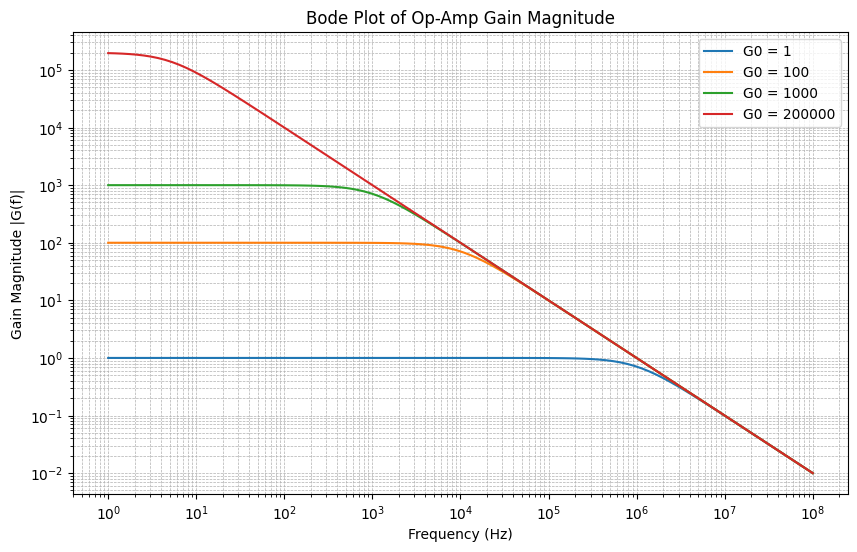

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
"""
Create a Bode plot (log-log plot of a property vs frequency) for the magnitude of various gain values shown above.
- On the same log-log plot, plot $|G(f)|$ for $G_0=$ 1, 100, 1000, and $A_{vol}$
- It will help to express $|G(f)|$ in terms of the GBW (or $f_t$) instead of WRT $f_B$.
- make the range of the x-axis from 1Hz - 100MHz
"""
def opamp_gain_magnitude(frequency_hz, G_0):
    """
    Calculate the magnitude of the gain of an operational amplifier
    at a given frequency.

    Parameters:
    frequency_hz (float): Frequency in Hertz.
    G_0 (float): Open-loop gain at DC (0 Hz).
    f_B (float): Bandwidth frequency in Hertz.

    Returns:
    float: Magnitude of the gain at the specified frequency.
    """
    gain = G_0 / np.sqrt(1 + (frequency_hz / (1e6 / G_0))**2)
    return gain

frequencies = np.logspace(0, 8, num=100)  # Frequencies from 1 Hz to 100 MHz
G_0 = np.array([1, 100, 1000, 200000])  # Different open-loop gains

plt.figure(figsize=(10, 6))
for G in G_0:
    gain_magnitudes = opamp_gain_magnitude(frequencies, G)
    plt.loglog(frequencies, gain_magnitudes, label=f'G0 = {G}')
plt.title('Bode Plot of Op-Amp Gain Magnitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain Magnitude |G(f)|')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

## 2.6 Negative feedback continuted
2.6.1 Start with $V_{out} = A(V_+ - V_-)$ and use the first two golden rules to show that $G_0 = 1$ and that $V_+ = V_-$.

$$V_+ = V_{in} \implies V_{out} = A(V_{in} - V_{out})$$
$$ (1+A) V_{out} = AV_{in} \implies \frac{V_{out}}{V_{in}} = \frac{A}{1+A}$$


## 2.7 Non-Inverting Amplifier
For a non inverting amplifier, we have the circuits 

![Non-inverting amp]("https://ucboulder.github.io/PHYS-3330/lab-guides/lab4#prelab")

We have the two resistors on the negative feedback side form a voltage divider feedback network with transfer function 
$$ B = \frac{R}{R_F + R} $$

2.7.1 Use golden rules 2 and 3 to show that the DC gain $G_0$ of the non-inverting amplifier
$$G_0 = \frac 1 B = 1 + \frac{R_F}{R}$$
*Hint 1*: First use the second golden rule and Kirchoff's current law to argue that the current flowing through $R_F$ is the same as the current flowing through $R$.
*Hint 2*: Use Kirkhoff's voltage rule tracing from $V_{out}$ to ground and from $V_{in}$ to ground to make two equations. You can use these to find $V_{out}/V_{in}$

No current flows into the op-amp input terminals, so $I_{R_F} = I_R$. The op-amp drive its output such that $V_- = V_+$, so $V_+ = V_{in}$ and thus $V_- = V_{in}$. We now consider the Kirchoff's voltage law from $V_{out}$ to ground:
- Voltage across $R_F$: $V_{out}- V_{in}$
- Voltage acoross $R$: $V_{in} - 0 = V_{in}$
Using Ohm's law with the same current $I$:
$$I = \frac{V_{out} - V_{in}}{R_F} = \frac{V_{in}}{R}.$$
Then solving for the gain:
$$ V_{out} - V_{in} = V_{in} \frac{R_F}{R}$$
$$ V_{out} = V_{in}\left(1 + \frac{R_F}{R}\right)$$
so we get
$$G_0 = \frac{V_{out}}{V_{in}} = 1+ \frac{R_F}{R}$$

2.7.2 Calculate $G_0$ and the bandwidth $f_B$ for the non-inverting amplifier with $R_F = 10\text{k}\Omega$ and $R = 100\Omega$. Feel free to round $G_0$ to a nice clean number.

$$G_0 = 1+ \frac{100\text{k}\Omega}{100\Omega} = 101 \approx 100$$

For the LF356, $\text{GBW} = 5\text{MHz}$, so 
$$f_B = \frac{\text{GBW}}{G_0} = \frac{5\text{MHz}}{100} = 50\text{kHz}$$

5.7.3 Predict the amplitude of the output voltage $V_{out}$ for the non-inverting amp with $R_F = 10\text{k}\Omega$ and $R = 100\Omega$ when 
- $V_{in} = 1mV$: $V_{out} \approx G_0 \cdot V_{in} = 101 \times 0.001 = 0.101V$
- $V_{in} = 1V$: $V_{out} \approx 101 \times 1 = 101V$

## 2.8 Input and Output impedance of the non-inverting amplifier
The non-inverting op-amp has different input impedance $R_i'$ and output impedance $R_o'$ from the bare op-amp. They are 
$$ R_i' = R_i(1+AB); \hspace{.5cm} R_o' = \frac{R_0}{(1+AB)}$$
Where $R_i$ and $R_o$ are the input and output impedances of the bare op-amp. With reasonable conditions, $AB$ is quite large.

2.8.1 The output impedance of the LF356 with no feedback is about $40\Omega$. Calculate $R_i'$ and $R_o'$ when $R_F = 10\text{k}\Omega$ and $R = 100\Omega$. Does it seem reasonable to assume the input impedance is infinitely large and the ouptut impedance is 0? 

$$ B = \frac{1}{1+\frac{R_F}{R}} = \frac{1}{101}$$
so $AB \approx G_0 \approx 101$. This is reasonable since the LF356 has a large open-loop gain ($AB\gg 1$). Now $R_i \sim 10^{13} \Omega$ so 
$$ R_i = 10^{12} \times (1 + 101) \approx 102 \times 10^{12} \approx 1.0 \times 10^{14} \Omega$$

$$ R_o' = \frac{R_o}{1+AB} = \frac{40}{102} \approx 0.39 \Omega.$$

It is functionally accurate to say that $10^{14}\Omega$ is almost infinite and $0.4\Omega$ is basically zero. 

2.8.2 The oscillocope has a finite meansurement impedance ($1\text{M}\Omega$), so if you measure $V_{in}$, you put a resistance $R_{scope}$ from input to ground. This will reduce the input impedance of the amplifier. When $R_F = 10\text{k}\Omega$, and $R=100\Omega$, what is the input impedance of the amplifier. *Hint*: $R_{scope}$ is in parallel with $R_i'$.

$$R_{in,total} = \left( \frac{1}{R_{scope}} + \frac{1}{R_i'} \right)^{-1}$$
$$R_{in,total} = \left( \frac{1}{10^6} + \frac{1}{10^{14}} \right)^{-1}$$
but $\frac{1}{10^{14}} \ll \frac{1}{10^6}$ so 
$$R_{in,total} \approx \left( \frac{1}{10^6} \right)^{-1} = 10^6 \Omega = 1M\Omega$$

This significantly decreases the input impedance ($10^{14}\Omega$ to $10^6 \Omega$).

2.8.3 The buffer is a non-inverting amplifier with $R_F = 0$ and $R = \infty$. We already know that it has a DC gain of 1, so $B = 1$. Calculate $R_i'$ and $R_o'$ for the buffer. 

We have $A= 2\times 10^5$, $R_i = 2\times 10^5 \Omega$ and $R_o = 40\Omega$ for the bare op-amp

$$ R_i' = R_i (1+AB) = R_i (1+A) = 10^{12}\Omega (1 + 2\times 10^5) \approx 2\times 10^{17} \Omega$$
and
$$R_o' = \frac{R_o}{(1+AB)} = \frac{40\Omega}{1 + 2\times 10^5} \approx 2\times 10^{-4} \Omega$$

Very high input impedance, and very low output impedance!

## Section 2.9 Powering the op-amp
2.9.1 Check the datasheet for the maximum output voltage when the LF356 is powered with $\pm 15V$. This is usually referred to as the output voltage swing.

When powered with $\pm 15V$, the maximum voltage swing of the LF356 is $\pm 13V$.

2.9.2 Look back at your calculations in prelab 2.7.3; when supplying the LF356 with $\pm 15V$, what do you expect happens when the $V_{out}$ is greater than the output voltage swing.

For a $V_{in} = 1V$, we saw that theoretically it could go up to $101V$, but this is greater than the $\pm 13V$ threshold. I would guess that the signal is clipped at the $13V$ threshold.

2.9.3
First built this circuit
![Circuit](Images/Prelab4-2.9.3-Circuit-1.png)
Then we measured the input and output voltages of the op-amp, and they were exactly the same (transmission coefficient = 1)
![Voltage Follower](Images/Prelab4-2.9.3-Voltage-Follower-Output.png)
We made a "non-ideal" voltage source by adding 1mH inductors to the positive and negative terminals of the voltage source. This lead to the measurement
![Inductors](Images/Prelab4-2.9.3-Inductors.png)
Here, the 1V DC source starts to become AC since we have
$$V_L = L \frac{dI}{dt}$$
so when we "turn on" the circuit, the inductor tries to resist the change in current, creating the wobble in voltage. As time goes on, the current starts to stabilize, although at our time scale, this is imperceptible. 

After adding decoupling capacitors, the voltage goes back to looking like it is DC becuase the capacitors are acting as buffers, filling in gaps when the voltage goes down and absorbing voltage when it goes up from the inductors. This is what we observed after measuring
![Capacitors](Images/Prelab4-2.9.3-ind-w-cap.png)